## Rabi oscillation with detuning and biased state detect

For our case, it can be due to inefficient OP for state-dependent imaging, introducing a bias for the dark state detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [104]:
def H_Rabi(tList, detuning=0.5, bias=0.5):
    H = sigmax() + detuning*sigmaz()
    
    rho_0 = fock_dm(2, 0)
    rho_1 = fock_dm(2, 1)
    meas_0 = fock_dm(2, 0)
    meas_1 = fock_dm(2, 1)

    _P0_0, _P0_1 = mesolve(H, rho_0, tList, [], [meas_0, meas_1]).expect
    _P1_0, _P1_1 = mesolve(H, rho_1, tList, [], [meas_0, meas_1]).expect
    
    P0_0 = _P0_0/(_P0_0+_P0_1*(1-bias))
    P0_1 = _P0_1/(_P0_0+_P0_1*(1-bias))*(1-bias)    
    P1_0 = _P1_0/(_P1_0+_P1_1*(1-bias))
    P1_1 = _P1_1/(_P1_0+_P1_1*(1-bias))*(1-bias)
    
    return P0_0, P0_1, P1_0, P1_1

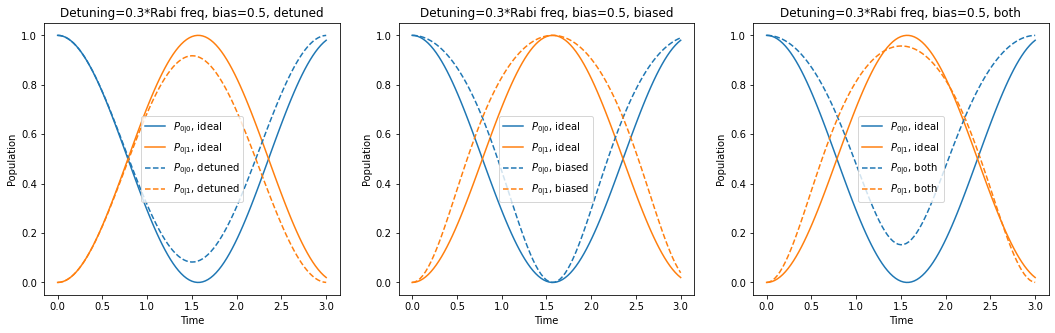

In [107]:
tList = np.linspace(0, 3, 101)
detuning = 0.3
bias = 0.5

meas = H_Rabi(tList, detuning, bias)
meas_no_bias = H_Rabi(tList, detuning, 0)
meas_no_detuning = H_Rabi(tList, 0, bias)
meas_ideal = H_Rabi(tList, 0, 0)

cond_list = ['detuned', 'biased', 'both']

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i in ax:
    i.plot(tList, meas_ideal[0], '-', color='tab:blue', label='$P_{0|0}$, ideal')
    i.plot(tList, meas_ideal[2], '-', color='tab:orange', label='$P_{0|1}$, ideal')
ax[0].plot(tList, meas_no_bias[0], '--', color='tab:blue', label='$P_{0|0}$, detuned')
ax[0].plot(tList, meas_no_bias[2], '--', color='tab:orange', label='$P_{0|1}$, detuned')
ax[1].plot(tList, meas_no_detuning[0], '--', color='tab:blue', label='$P_{0|0}$, biased')
ax[1].plot(tList, meas_no_detuning[2], '--', color='tab:orange', label='$P_{0|1}$, biased')
ax[2].plot(tList, meas[0], '--', color='tab:blue', label='$P_{0|0}$, both')
ax[2].plot(tList, meas[2], '--', color='tab:orange', label='$P_{0|1}$, both')

for i in range(3):
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Population')
    ax[i].legend()
    ax[i].set_title('Detuning='+str(detuning)+'*Rabi freq, bias='+str(bias)+', '+cond_list[i])